# Load libraries and Data

In [1]:
# standard libraries
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 30)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import math
# plt.figure(figsize=(16,6))  # set the plot size
# plt.ylim(-0.01, 0.04)  # set the axis zoom range
# plt.xlim(-0.01, 0.04)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pyhive import presto
import operator

def get_presto_conn():
    return presto.connect(host='presto-alpha-backend.data.houzz.net', port=8086, username='wandajuan')

def presto_query(query, presto_conn, fetchall=True):
    cursor = presto_conn.cursor()
    cursor.execute(query)
    header = list(map(operator.itemgetter(0), cursor.description))
    return header, cursor.fetchall()

conn = get_presto_conn() # establish the connection

In [5]:
!ls

0524 Spring lookbook.ipynb
Spring Lookbook 2022 - Media.xlsx
Spring Lookbook 2022 - Media_v2.xlsx
category_margins_feed_2022-06-01_23-18-47.csv
shop.springlook2022.sql
~$Spring Lookbook 2022 - Media_v2.xlsx


In [6]:
# df = pd.read_excel(open('Spring Lookbook 2022 - Media.xlsx', 'rb'), sheet_name = 'Pricing Cap')
df = pd.read_excel(open('Spring Lookbook 2022 - Media_v2.xlsx', 'rb'), sheet_name = 'Pricing Cap')
df

,Vendor/Seller,SKU,Product Name,Product ID,Price Cap,Product Link
0,Surya,PSA2379-710102,"Pasadena 6'7"" x 9' Denim Indoor/Outdoor Rug",183793679.0,216.0,https://www.houzz.com/products/pasadena-6-7-x-9-denim-indoor-outdoor-rug-prvw-vr~183793676
1,HiTeak Furniture,HLAC1127-C-W,"Summer Club Chair, White",130433496.0,1134.0,https://www.houzz.com/products/summer-club-chair-white-prvw-vr~130433496
2,ModaConcrete,311237,"36"" Concrete Coffee Table White",183070901.0,930.0,https://www.houzz.com/products/36-concrete-coffee-table-white-prvw-vr~183070901?lid=125308169
3,Serene Spaces Living,SSLCH12613050SFS,"Serene Spaces Living Faux Lemon Tree in Black Pot, 47""",149082617.0,215.0,https://www.houzz.com/products/serene-spaces-living-faux-lemon-tree-in-black-pot-47-prvw-vr~149082617
4,Brimfield & May,46459,"White Fiber Clay Outdoor Stool, 16 ""x14 ""x14 """,121775073.0,71.0,https://www.houzz.com/products/white-fiber-clay-outdoor-stool-16-x14-x14-prvw-vr~121775073
...,...,...,...,...,...,...
36,Winsome House Inc.,WHPL507,White MgO 22.4in. H White Geometric Pattern Round Tall Planter,140697157.0,99.0,https://www.houzz.com/products/white-mgo-22-4in-h-white-geometric-pattern-round-tall-planter-prvw-vr~140697157
37,Napa Home & Garden,PS218,"Lawrence Lantern, 11.75""",163454792.0,91.0,https://www.houzz.com/products/lawrence-lantern-11-75-prvw-vr~163454792
38,Veradek,KNV20C,"Pure Series Kona 20"" Planter, Gray",172958618.0,57.0,https://www.houzz.com/products/pure-series-kona-20-planter-gray-prvw-vr~172958618
39,Winsome House Inc.,WHPL871,White Geo-Design Round MgO Planter,155947597.0,52.0,https://www.houzz.com/products/white-geo-design-round-mgo-planter-prvw-vr~155947597


In [7]:
df = df.loc[df['Product ID'].notna()]
df

,Vendor/Seller,SKU,Product Name,Product ID,Price Cap,Product Link
0,Surya,PSA2379-710102,"Pasadena 6'7"" x 9' Denim Indoor/Outdoor Rug",183793679.0,216.0,https://www.houzz.com/products/pasadena-6-7-x-9-denim-indoor-outdoor-rug-prvw-vr~183793676
1,HiTeak Furniture,HLAC1127-C-W,"Summer Club Chair, White",130433496.0,1134.0,https://www.houzz.com/products/summer-club-chair-white-prvw-vr~130433496
2,ModaConcrete,311237,"36"" Concrete Coffee Table White",183070901.0,930.0,https://www.houzz.com/products/36-concrete-coffee-table-white-prvw-vr~183070901?lid=125308169
3,Serene Spaces Living,SSLCH12613050SFS,"Serene Spaces Living Faux Lemon Tree in Black Pot, 47""",149082617.0,215.0,https://www.houzz.com/products/serene-spaces-living-faux-lemon-tree-in-black-pot-47-prvw-vr~149082617
4,Brimfield & May,46459,"White Fiber Clay Outdoor Stool, 16 ""x14 ""x14 """,121775073.0,71.0,https://www.houzz.com/products/white-fiber-clay-outdoor-stool-16-x14-x14-prvw-vr~121775073
...,...,...,...,...,...,...
36,Winsome House Inc.,WHPL507,White MgO 22.4in. H White Geometric Pattern Round Tall Planter,140697157.0,99.0,https://www.houzz.com/products/white-mgo-22-4in-h-white-geometric-pattern-round-tall-planter-prvw-vr~140697157
37,Napa Home & Garden,PS218,"Lawrence Lantern, 11.75""",163454792.0,91.0,https://www.houzz.com/products/lawrence-lantern-11-75-prvw-vr~163454792
38,Veradek,KNV20C,"Pure Series Kona 20"" Planter, Gray",172958618.0,57.0,https://www.houzz.com/products/pure-series-kona-20-planter-gray-prvw-vr~172958618
39,Winsome House Inc.,WHPL871,White Geo-Design Round MgO Planter,155947597.0,52.0,https://www.houzz.com/products/white-geo-design-round-mgo-planter-prvw-vr~155947597


In [8]:
df['Product ID'] = df['Product ID'].astype(int)
df

,Vendor/Seller,SKU,Product Name,Product ID,Price Cap,Product Link
0,Surya,PSA2379-710102,"Pasadena 6'7"" x 9' Denim Indoor/Outdoor Rug",183793679,216.0,https://www.houzz.com/products/pasadena-6-7-x-9-denim-indoor-outdoor-rug-prvw-vr~183793676
1,HiTeak Furniture,HLAC1127-C-W,"Summer Club Chair, White",130433496,1134.0,https://www.houzz.com/products/summer-club-chair-white-prvw-vr~130433496
2,ModaConcrete,311237,"36"" Concrete Coffee Table White",183070901,930.0,https://www.houzz.com/products/36-concrete-coffee-table-white-prvw-vr~183070901?lid=125308169
3,Serene Spaces Living,SSLCH12613050SFS,"Serene Spaces Living Faux Lemon Tree in Black Pot, 47""",149082617,215.0,https://www.houzz.com/products/serene-spaces-living-faux-lemon-tree-in-black-pot-47-prvw-vr~149082617
4,Brimfield & May,46459,"White Fiber Clay Outdoor Stool, 16 ""x14 ""x14 """,121775073,71.0,https://www.houzz.com/products/white-fiber-clay-outdoor-stool-16-x14-x14-prvw-vr~121775073
...,...,...,...,...,...,...
36,Winsome House Inc.,WHPL507,White MgO 22.4in. H White Geometric Pattern Round Tall Planter,140697157,99.0,https://www.houzz.com/products/white-mgo-22-4in-h-white-geometric-pattern-round-tall-planter-prvw-vr~140697157
37,Napa Home & Garden,PS218,"Lawrence Lantern, 11.75""",163454792,91.0,https://www.houzz.com/products/lawrence-lantern-11-75-prvw-vr~163454792
38,Veradek,KNV20C,"Pure Series Kona 20"" Planter, Gray",172958618,57.0,https://www.houzz.com/products/pure-series-kona-20-planter-gray-prvw-vr~172958618
39,Winsome House Inc.,WHPL871,White Geo-Design Round MgO Planter,155947597,52.0,https://www.houzz.com/products/white-geo-design-round-mgo-planter-prvw-vr~155947597


In [9]:
len(list(df['Product ID'].map(str)))

36

36 house_id to cap price with target margin

# Check Historical product cost and product price

In [10]:
date_list1 = "'"+ "', '".join(pd.date_range(start='7/23/2020', end='5/30/2022', freq='M').strftime('%Y-%m-%d').map(str)) + "'"
date_list2 = "'"+ "', '".join(pd.date_range(start='5/15/2022', end='5/30/2022', freq='D').strftime('%Y-%m-%d').map(str)) + "'"
hz_list = ", ".join(list(df['Product ID'].map(str)))

In [11]:
q = """
    select dt, seller_type_desc, vendor_name, house_id, vendor_listing_id, title, final_cost_to_houzz, final_display_price, pricing_logic
    from shop.product_master_table_daily pmt
    where dt in ({date_list1}, {date_list2}) 
    and house_id in ({hz_list})
""".format(date_list1=date_list1, date_list2=date_list2, hz_list=hz_list)

# print(q)
pmt = pd.read_sql(q, conn)

In [12]:
pmt = pmt.sort_values(by=['house_id', 'dt'])
# pmt.to_clipboard()
pmt

,dt,seller_type_desc,vendor_name,house_id,vendor_listing_id,title,final_cost_to_houzz,final_display_price,pricing_logic
891,2020-07-31,Direct,KOUBOO,4715144,96298534,Large Sized Rectangular Sea Grass Basket,113.88,166.0,priced_with_comp
1039,2020-08-31,Direct,KOUBOO,4715144,96298534,Large Sized Rectangular Sea Grass Basket,113.88,150.0,rule_priced
614,2020-09-30,Direct,KOUBOO,4715144,96298534,Large Sized Rectangular Sea Grass Basket,113.88,150.0,rule_priced
640,2020-10-31,Direct,KOUBOO,4715144,96298534,Large Sized Rectangular Sea Grass Basket,113.88,150.0,priced_with_comp
1005,2020-11-30,Direct,KOUBOO,4715144,96298534,Large Sized Rectangular Sea Grass Basket,113.88,147.0,priced_with_comp
...,...,...,...,...,...,...,...,...,...
207,2022-05-26,Direct,nuLOOM,184086802,125842231,"nuLOOM Houzz Exclusive Jae Moroccan Faux Jute Indoor/Outdoor Area Rug, Natural,",366.09,489.0,ptg
82,2022-05-27,Direct,nuLOOM,184086802,125842231,"nuLOOM Houzz Exclusive Jae Moroccan Faux Jute Indoor/Outdoor Area Rug, Natural,",366.09,489.0,ptg
68,2022-05-28,Direct,nuLOOM,184086802,125842231,"nuLOOM Houzz Exclusive Jae Moroccan Faux Jute Indoor/Outdoor Area Rug, Natural,",366.09,489.0,ptg
131,2022-05-29,Direct,nuLOOM,184086802,125842231,"nuLOOM Houzz Exclusive Jae Moroccan Faux Jute Indoor/Outdoor Area Rug, Natural,",366.09,489.0,ptg


In [13]:
pd.pivot_table(data=pmt, index=['house_id', 'vendor_listing_id'], columns='dt', values='final_cost_to_houzz')#.to_clipboard()

,dt,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30
house_id,vendor_listing_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4715144,96298534,113.88,113.88,113.88,113.88,113.88,121.24,120.98,121.12,121.42,121.36,125.92,126.58,126.58,126.98,127.07,128.78,129.37,129.24,126.95,127.26,128.08,128.59,128.86,128.86,128.86,128.86,129.00,129.00,129.00,129.00,129.00,129.00,129.00,128.93,128.93,128.93,128.93,128.93
4715214,96298637,81.65,81.65,81.65,81.65,81.65,88.98,88.46,88.59,88.84,88.79,98.84,99.45,99.45,99.87,99.94,101.62,102.16,102.03,99.67,99.92,100.66,97.50,97.73,97.73,97.73,97.73,101.45,101.45,101.45,101.45,101.45,101.45,101.45,97.80,97.80,97.80,97.80,97.80
34045135,19752347,89.59,89.59,89.59,94.39,94.39,100.47,100.89,100.96,101.10,101.08,101.10,113.28,121.86,121.98,122.01,122.11,95.98,125.98,155.05,155.21,155.63,144.69,125.12,125.12,125.12,144.90,144.90,144.90,144.90,144.90,144.90,144.90,144.86,125.15,125.15,125.15,125.15,125.15
65243100,49329008,78.43,78.43,78.43,78.43,78.43,78.47,78.77,78.84,78.95,78.92,78.95,79.09,79.09,79.24,79.26,79.34,79.56,83.18,79.85,79.97,80.30,80.49,67.21,67.21,67.21,80.66,80.66,80.66,80.66,80.66,80.66,80.66,80.65,67.24,67.24,67.24,67.24,67.24
78163950,61087634,29.95,29.95,29.95,29.95,29.95,NaN,NaN,31.88,31.98,31.95,31.98,32.11,32.11,32.24,32.28,32.35,32.56,36.19,32.87,32.99,33.33,33.52,33.64,33.64,33.64,33.72,33.72,33.72,33.72,33.72,33.72,33.72,33.67,33.67,33.67,33.67,33.67,33.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183070901,125308169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.10,552.03,585.54,548.14,548.14,548.14,590.14,591.29,591.29,591.29,591.29,591.29,591.29,549.29,549.29,549.29,549.29,549.29,549.29
183126200,125320679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1162.70,1165.28,1165.28,1165.28,1274.03,1274.03,1274.03,1274.03,1274.03,1274.03,1274.03,1274.03,1165.28,1165.28,1165.28,1165.28,1165.28
183476775,125507210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.67,94.19,78.26,78.41,78.41,78.41,94.65,94.75,94.75,94.75,94.75,94.75,94.75,78.51,78.47,78.47,78.47,78.47,78.47


<AxesSubplot:xlabel='dt'>

<Figure size 1152x432 with 0 Axes>

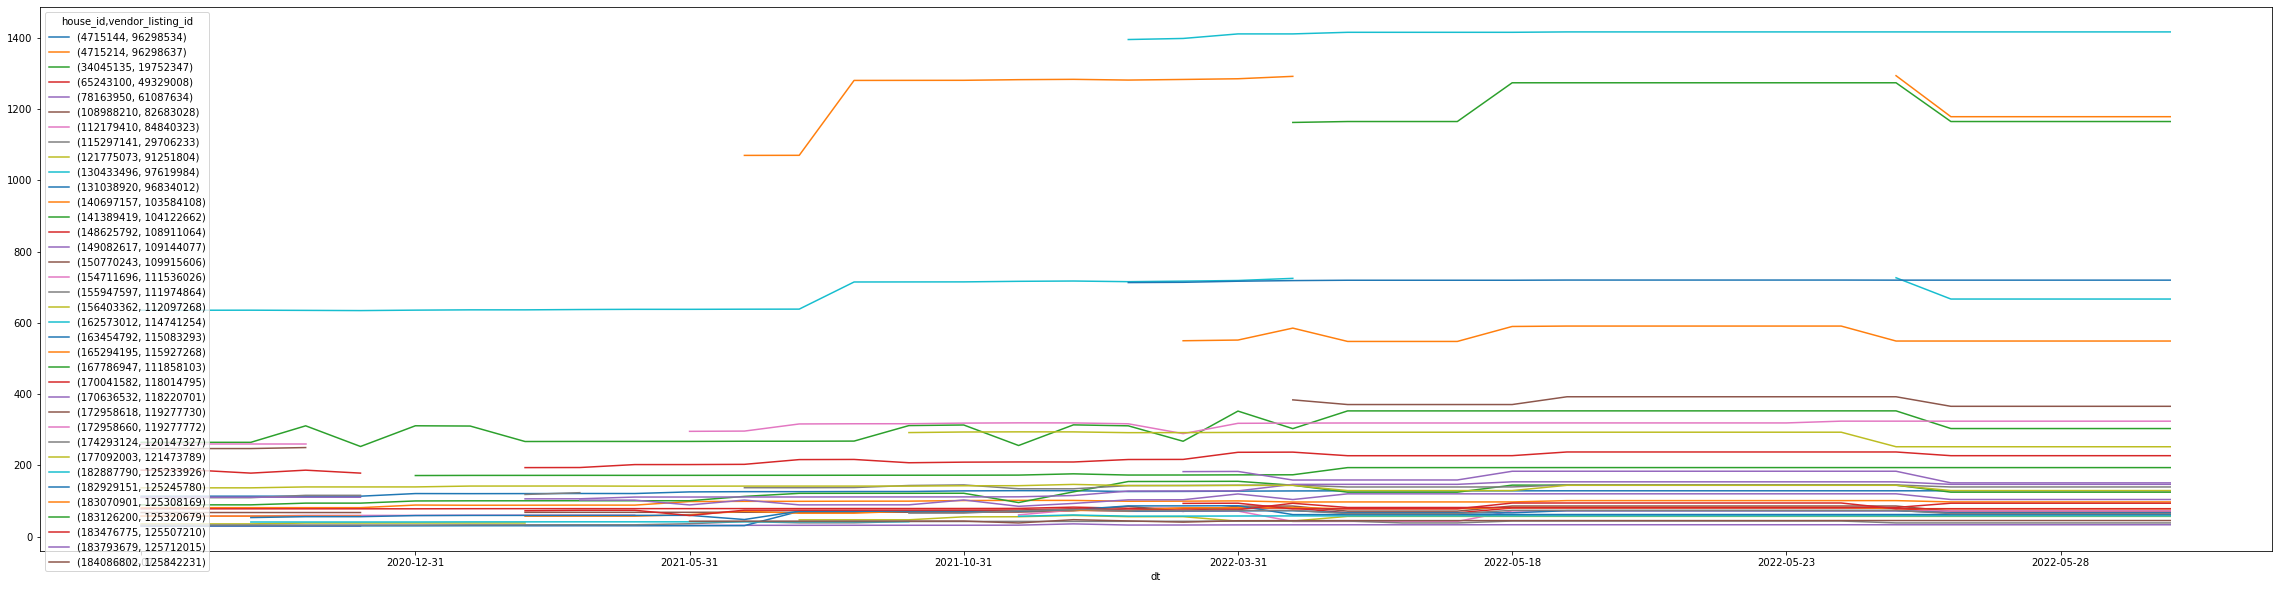

In [14]:
plt.figure(figsize=(16,6))
pd.pivot_table(data=pmt, columns=['house_id', 'vendor_listing_id'], index='dt', values='final_cost_to_houzz').plot(figsize=(40,10))

Product costs have been flat recently

<AxesSubplot:xlabel='dt'>

<Figure size 1152x432 with 0 Axes>

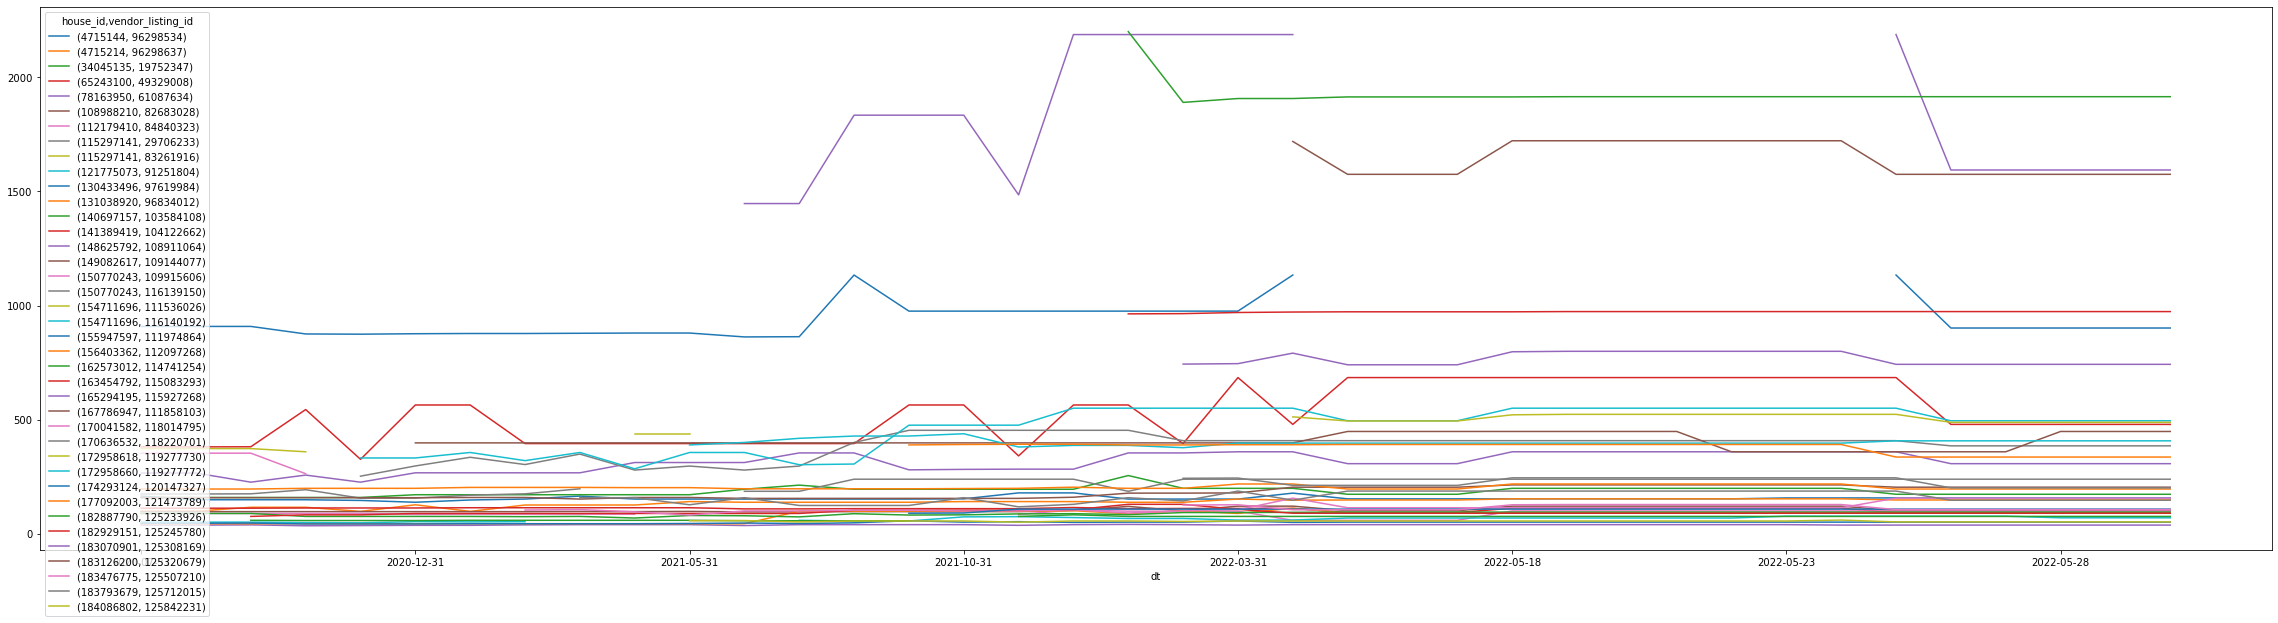

In [15]:
plt.figure(figsize=(16,6))
pd.pivot_table(data=pmt, columns=['house_id', 'vendor_listing_id'], index='dt', values='final_display_price').plot(figsize=(40,10))

In [16]:
pmt.loc[pmt['pricing_logic']=='tg', 'house_id'].nunique()

28

# Get all vendor listing ids

In [17]:
# get all listings
q = """
select house_id, vendor_listing_id, category_id, all_status_valid, final_display_price, fcth
from shop.vl_pupil
where 
--all_status_valid = true 
--and 
seller_type not in (0, 5)
and house_id in ({hz_list})
""".format(hz_list=hz_list)

vl = pd.read_sql(q, conn)
vl

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth
0,183476775,125507210,29476,True,107.00,78.47
1,183793679,125712015,23025,True,202.00,151.26
2,115297141,29706233,29484,True,240.00,139.75
3,34045135,19752347,29128,True,174.00,125.15
4,112179410,84486421,29128,False,89.99,58.45
...,...,...,...,...,...,...
39,4715214,96282672,13011,False,0.00,NaN
40,141389419,104122662,23025,True,685.00,303.68
41,183126200,125320679,23035,True,1575.00,1165.28
42,65243100,49329008,11101,True,94.00,67.24


In [18]:
vl['all_status_valid'].value_counts()

True     34
False    10
Name: all_status_valid, dtype: int64

In [19]:
vl.loc[vl['all_status_valid']==False]

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth
4,112179410,84486421,29128,False,89.99,58.45
6,4715144,96282114,22012,False,0.00,NaN
7,4715144,96282578,22012,False,0.00,NaN
15,4715144,96297182,22012,False,0.00,NaN
19,4715214,96282208,13011,False,0.00,NaN
21,150770243,109915606,23035,False,344.00,254.46
30,154711696,111536026,23035,False,382.00,282.17
36,4715214,96297292,13011,False,0.00,NaN
37,130433496,96475088,23035,False,619.00,466.10
39,4715214,96282672,13011,False,0.00,NaN


In [20]:
# exlcude invalid fcth
vl = vl.loc[vl['fcth']>0]
vl

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth
0,183476775,125507210,29476,True,107.00,78.47
1,183793679,125712015,23025,True,202.00,151.26
2,115297141,29706233,29484,True,240.00,139.75
3,34045135,19752347,29128,True,174.00,125.15
4,112179410,84486421,29128,False,89.99,58.45
...,...,...,...,...,...,...
38,167786947,111858103,23023,True,449.00,194.09
40,141389419,104122662,23025,True,685.00,303.68
41,183126200,125320679,23035,True,1575.00,1165.28
42,65243100,49329008,11101,True,94.00,67.24


In [21]:
vl.groupby('house_id')['vendor_listing_id'].nunique().sort_values(ascending=False)

house_id
130433496    2
112179410    2
177092003    1
165294195    1
167786947    1
            ..
108988210    1
78163950     1
65243100     1
34045135     1
184086802    1
Name: vendor_listing_id, Length: 36, dtype: int64

In [22]:
vl['vendor_listing_id'].nunique()

38

38 vendor listing ids to update tg (excl. fcth is NaN)

In [23]:
vl_list = ', '.join(list(vl['vendor_listing_id'].map(str)))

# Check Current Target Margin

## check current listing level target margin for 44 vls

In [24]:
q = """
select 
        house_id,
        vendor_listing_id,
		json_extract_scalar(variation_attr, '$.fm') fm,
		json_extract_scalar(variation_attr, '$.tgtm') tgm
from c2.vendor_listings
where json_extract(variation_attr, '$.fm') is not null
and vendor_listing_id in ({vl_list})
""".format(vl_list=vl_list)

vl_m = pd.read_sql(q, conn)
vl_m

,house_id,vendor_listing_id,fm,tgm
0,78163950,61087634,0.13,0.3
1,4715144,96298534,0.18,0.32
2,131038920,96834012,0.19,0.35
3,121775073,91251804,0.18,0.28
4,156403362,112097268,0.22,0.34
5,170041582,118014795,0.18,0.28
6,4715214,96298637,0.23,0.34
7,170636532,118220701,0.17,0.29


8 houses / vendor listiings have listing level tg & fl

In [25]:
# currently all valid products with listing level margins
vl = vl.merge(vl_m, how='left')

## check current category level target margin 

In [26]:
vl['category_id'].value_counts()

23035    5
29128    4
23023    4
23025    3
29114    2
29484    2
11200    1
29475    1
23037    1
22012    1
23034    1
23033    1
29476    1
23007    1
11201    1
11101    1
23004    1
23003    1
13013    1
13011    1
29134    1
29001    1
29250    1
29118    1
Name: category_id, dtype: int64

In [27]:
cate_m = pd.read_csv('category_margins_feed_2022-06-01_23-18-47.csv')

In [28]:
cate_m = cate_m.loc[cate_m['tradeStatus']=='Consumer']
cate_m

,categoryId,categoryName,categoryPath,categoryLevel,status,categoryMarginId,categoryMarginFloor,categoryMarginRecommended,brands,tradeStatus
0,2,products,2,1,Active,NaN,0.00,0.0,[],Consumer
1,2007,baby and kids,2 → 2007,2,Active,NaN,0.00,0.0,[],Consumer
2,29401,baby and kids tableware,2 → 2007 → 29401,3,Active,756.0,10.00,25.0,[],Consumer
3,29403,baby and kids silverware,2 → 2007 → 29401 → 29403,4,Active,1022.0,12.49,25.0,[],Consumer
4,29402,baby cups and dishes,2 → 2007 → 29401 → 29402,4,Active,1387.0,12.49,25.0,[],Consumer
...,...,...,...,...,...,...,...,...,...,...
975,21007,roman shades,2 → 2012 → 21002 → 21007,4,Active,992.0,12.70,25.0,[],Consumer
976,21005,venetian blinds,2 → 2012 → 21002 → 21005,4,Active,1259.0,12.70,25.0,[],Consumer
977,21003,vertical blinds,2 → 2012 → 21002 → 21003,4,Active,NaN,0.00,0.0,[],Consumer
978,29167,window film,2 → 2012 → 29167,3,Active,869.0,14.66,25.0,[],Consumer


In [29]:
cate_m['status'].value_counts()

Active      974
Inactive      6
Name: status, dtype: int64

In [30]:
cate_m.rename(columns={'categoryId': 'category_id'}, inplace=True)

In [32]:
vl = vl.merge(cate_m[['category_id', 'categoryName', 'status', 'categoryMarginFloor', 'categoryMarginRecommended']], how='left')
vl['status'].value_counts()

Active    38
Name: status, dtype: int64

In [33]:
vl['categoryMarginFloor'] = vl['categoryMarginFloor']/100
vl['categoryMarginRecommended'] = vl['categoryMarginRecommended']/100
vl

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth,fm,tgm,categoryName,status,categoryMarginFloor,categoryMarginRecommended
0,183476775,125507210,29476,True,107.00,78.47,NaN,NaN,outdoor folding chairs,Active,0.1362,0.26
1,183793679,125712015,23025,True,202.00,151.26,NaN,NaN,outdoor rugs,Active,0.1295,0.25
2,115297141,29706233,29484,True,240.00,139.75,NaN,NaN,outdoor dining chairs,Active,0.1428,0.26
3,34045135,19752347,29128,True,174.00,125.15,NaN,NaN,candleholders,Active,0.1888,0.28
4,112179410,84486421,29128,False,89.99,58.45,NaN,NaN,candleholders,Active,0.1888,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...
33,167786947,111858103,23023,True,449.00,194.09,NaN,NaN,outdoor pots and planters,Active,0.1295,0.25
34,141389419,104122662,23025,True,685.00,303.68,NaN,NaN,outdoor rugs,Active,0.1295,0.25
35,183126200,125320679,23035,True,1575.00,1165.28,NaN,NaN,outdoor lounge chairs,Active,0.1590,0.26
36,65243100,49329008,11101,True,94.00,67.24,NaN,NaN,dinner plates,Active,0.1235,0.28


In [34]:
vl['current tg'] = np.where(vl['tgm'].isna(), vl['categoryMarginRecommended'], vl['tgm'])
vl['current fl'] = np.where(vl['fm'].isna(), vl['categoryMarginFloor'], vl['fm'])
vl

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth,fm,tgm,categoryName,status,categoryMarginFloor,categoryMarginRecommended,current tg,current fl
0,183476775,125507210,29476,True,107.00,78.47,NaN,NaN,outdoor folding chairs,Active,0.1362,0.26,0.26,0.1362
1,183793679,125712015,23025,True,202.00,151.26,NaN,NaN,outdoor rugs,Active,0.1295,0.25,0.25,0.1295
2,115297141,29706233,29484,True,240.00,139.75,NaN,NaN,outdoor dining chairs,Active,0.1428,0.26,0.26,0.1428
3,34045135,19752347,29128,True,174.00,125.15,NaN,NaN,candleholders,Active,0.1888,0.28,0.28,0.1888
4,112179410,84486421,29128,False,89.99,58.45,NaN,NaN,candleholders,Active,0.1888,0.28,0.28,0.1888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,167786947,111858103,23023,True,449.00,194.09,NaN,NaN,outdoor pots and planters,Active,0.1295,0.25,0.25,0.1295
34,141389419,104122662,23025,True,685.00,303.68,NaN,NaN,outdoor rugs,Active,0.1295,0.25,0.25,0.1295
35,183126200,125320679,23035,True,1575.00,1165.28,NaN,NaN,outdoor lounge chairs,Active,0.1590,0.26,0.26,0.159
36,65243100,49329008,11101,True,94.00,67.24,NaN,NaN,dinner plates,Active,0.1235,0.28,0.28,0.1235


# get Price Cap & calculate new target margins

In [35]:
vl = vl.merge(df[['Product ID', 'Price Cap']], how='left', left_on='house_id', right_on='Product ID')

In [37]:
vl['new tg'] = 1 - vl['fcth']/vl['Price Cap']
vl

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth,fm,tgm,categoryName,status,categoryMarginFloor,categoryMarginRecommended,current tg,current fl,Product ID,Price Cap,new tg
0,183476775,125507210,29476,True,107.00,78.47,NaN,NaN,outdoor folding chairs,Active,0.1362,0.26,0.26,0.1362,183476775,129.0,0.391705
1,183793679,125712015,23025,True,202.00,151.26,NaN,NaN,outdoor rugs,Active,0.1295,0.25,0.25,0.1295,183793679,216.0,0.299722
2,115297141,29706233,29484,True,240.00,139.75,NaN,NaN,outdoor dining chairs,Active,0.1428,0.26,0.26,0.1428,115297141,240.0,0.417708
3,34045135,19752347,29128,True,174.00,125.15,NaN,NaN,candleholders,Active,0.1888,0.28,0.28,0.1888,34045135,200.0,0.374250
4,112179410,84486421,29128,False,89.99,58.45,NaN,NaN,candleholders,Active,0.1888,0.28,0.28,0.1888,112179410,101.0,0.421287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,167786947,111858103,23023,True,449.00,194.09,NaN,NaN,outdoor pots and planters,Active,0.1295,0.25,0.25,0.1295,167786947,449.0,0.567728
34,141389419,104122662,23025,True,685.00,303.68,NaN,NaN,outdoor rugs,Active,0.1295,0.25,0.25,0.1295,141389419,685.0,0.556672
35,183126200,125320679,23035,True,1575.00,1165.28,NaN,NaN,outdoor lounge chairs,Active,0.1590,0.26,0.26,0.159,183126200,1722.0,0.323298
36,65243100,49329008,11101,True,94.00,67.24,NaN,NaN,dinner plates,Active,0.1235,0.28,0.28,0.1235,65243100,113.0,0.404956


In [41]:
vl['current tg'] = vl['current tg'].astype(float)
vl['current fl'] = vl['current fl'].astype(float)

In [42]:
(vl['new tg'] > vl['current tg']).value_counts()

True     30
False     8
dtype: int64

In [45]:
vl.loc[vl['new tg'] < vl['current tg']]

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth,fm,tgm,categoryName,status,categoryMarginFloor,categoryMarginRecommended,current tg,current fl,Product ID,Price Cap,new tg
5,78163950,61087634,11200,True,39.0,33.67,0.13,0.3,wine glasses,Active,0.1168,0.27,0.30,0.1300,78163950,41.0,0.178780
6,140697157,103584108,23023,True,96.0,78.87,NaN,NaN,outdoor pots and planters,Active,0.1295,0.25,0.25,0.1295,140697157,99.0,0.203333
9,162573012,114741254,11201,True,77.0,58.61,NaN,NaN,everyday glasses,Active,0.1168,0.27,0.27,0.1168,162573012,77.0,0.238831
11,4715144,96298534,22012,True,158.0,128.93,0.18,0.32,baskets,Active,0.1609,0.28,0.32,0.1800,4715144,158.0,0.183987
13,172958660,119277772,23007,True,440.0,324.36,NaN,NaN,fire pits,Active,0.1312,0.26,0.26,0.1312,172958660,398.0,0.185025
21,121775073,91251804,29114,True,71.0,57.23,0.18,0.28,accent and garden stools,Active,0.1609,0.28,0.28,0.1800,121775073,71.0,0.193944
23,131038920,96834012,29001,True,92.0,67.22,0.19,0.35,serving trays,Active,0.1501,0.28,0.35,0.1900,131038920,92.0,0.269348
24,172958618,119277730,23023,True,53.0,45.54,NaN,NaN,outdoor pots and planters,Active,0.1295,0.25,0.25,0.1295,172958618,57.0,0.201053


In [44]:
(vl['current fl']>vl['new tg']).value_counts()

False    38
dtype: int64

In [53]:
vl['new fl'] = np.where(vl['current fl']>vl['new tg'], vl['new tg'], vl['fm'])
vl['new fl'] = vl['new fl'].astype(float)

In [58]:
vl.loc[vl['new fl'].notna(), ['new fl', 'fm']]

,new fl,fm
5,0.13,0.13
11,0.18,0.18
21,0.18,0.18
23,0.19,0.19
28,0.18,0.18
29,0.17,0.17
30,0.22,0.22
31,0.23,0.23


In [59]:
vl

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth,fm,tgm,categoryName,status,categoryMarginFloor,categoryMarginRecommended,current tg,current fl,Product ID,Price Cap,new tg,new fl
0,183476775,125507210,29476,True,107.00,78.47,NaN,NaN,outdoor folding chairs,Active,0.1362,0.26,0.26,0.1362,183476775,129.0,0.391705,NaN
1,183793679,125712015,23025,True,202.00,151.26,NaN,NaN,outdoor rugs,Active,0.1295,0.25,0.25,0.1295,183793679,216.0,0.299722,NaN
2,115297141,29706233,29484,True,240.00,139.75,NaN,NaN,outdoor dining chairs,Active,0.1428,0.26,0.26,0.1428,115297141,240.0,0.417708,NaN
3,34045135,19752347,29128,True,174.00,125.15,NaN,NaN,candleholders,Active,0.1888,0.28,0.28,0.1888,34045135,200.0,0.374250,NaN
4,112179410,84486421,29128,False,89.99,58.45,NaN,NaN,candleholders,Active,0.1888,0.28,0.28,0.1888,112179410,101.0,0.421287,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,167786947,111858103,23023,True,449.00,194.09,NaN,NaN,outdoor pots and planters,Active,0.1295,0.25,0.25,0.1295,167786947,449.0,0.567728,NaN
34,141389419,104122662,23025,True,685.00,303.68,NaN,NaN,outdoor rugs,Active,0.1295,0.25,0.25,0.1295,141389419,685.0,0.556672,NaN
35,183126200,125320679,23035,True,1575.00,1165.28,NaN,NaN,outdoor lounge chairs,Active,0.1590,0.26,0.26,0.1590,183126200,1722.0,0.323298,NaN
36,65243100,49329008,11101,True,94.00,67.24,NaN,NaN,dinner plates,Active,0.1235,0.28,0.28,0.1235,65243100,113.0,0.404956,NaN


# Write into DW

In [46]:
from sqlalchemy import *
from sqlalchemy.engine import create_engine
from sqlalchemy.schema import *
# Presto
engine = create_engine('presto://wandajuan@presto-alpha-backend.data.houzz.net:8086/hive/default')
# df_o.to_sql([table_name], schema='wandajuan', con=engine, index=False, \
#                      if_exists='fail', method='multi', chunksize=8000)

In [60]:
vl.to_sql('springlook2022_v4', schema='wandajuan', con=engine, index=False, \
                     if_exists='fail', method='multi', chunksize=8000)

In [43]:
vl['tgm']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
33     NaN
34    0.34
35     NaN
36    0.34
37     NaN
Name: tgm, Length: 38, dtype: object

In [70]:
vl.dtypes

house_id                       int64
vendor_listing_id              int64
category_id                    int64
all_status_valid                bool
final_display_price          float64
fcth                         float64
fm                            object
tgm                           object
categoryName                  object
categoryPath                  object
categoryLevel                  int64
status                        object
categoryMarginId             float64
categoryMarginFloor          float64
categoryMarginRecommended    float64
brands                        object
tradeStatus                   object
Product ID                     int64
Price Cap                    float64
new tg                       float64
current tg                   float64
current fl                   float64
dtype: object

In [39]:
vl['tgm'].isna()

0      True
1      True
2      True
3      True
4      True
      ...  
33     True
34    False
35     True
36    False
37     True
Name: tgm, Length: 38, dtype: bool

In [180]:
vl['new tg price'] = vl['fcth']/(1-vl['new tg'])
vl

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth,fm,tgm,categoryName,categoryPath,categoryLevel,status,categoryMarginId,categoryMarginFloor,categoryMarginRecommended,brands,tradeStatus,Product ID,Price Cap,new tg,new tg price
0,183793679,125712015,23025,True,202.0,151.26,NaN,NaN,outdoor rugs,2 → 2004 → 13012 → 23025,4,Active,975.0,0.1295,0.25,[],Consumer,183793679,216.0,0.299722,216.0
1,115297141,29706233,29484,True,240.0,139.75,NaN,NaN,outdoor dining chairs,2 → 2014 → 23002 → 29483 → 29484,5,Active,890.0,0.1428,0.26,[],Consumer,115297141,240.0,0.417708,240.0
2,183476775,125507210,29476,True,107.0,78.47,NaN,NaN,outdoor folding chairs,2 → 2014 → 23002 → 29473 → 29476,5,Active,923.0,0.1362,0.26,[],Consumer,183476775,129.0,0.391705,129.0
3,112179410,84840323,29128,True,101.0,72.45,NaN,NaN,candleholders,2 → 2004 → 29112 → 13001 → 29128,5,Active,786.0,0.1888,0.28,[],Consumer,112179410,101.0,0.282673,101.0
4,149082617,109144077,29134,True,205.0,147.12,NaN,NaN,artificial plants and trees,2 → 2004 → 29112 → 13030 → 29134,5,Active,1118.0,0.1365,0.28,[],Consumer,149082617,215.0,0.315721,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,4715144,96298534,22012,True,158.0,128.93,0.18,0.32,baskets,2 → 2004 → 29112 → 22012,4,Active,829.0,0.1609,0.28,[],Consumer,4715144,154.0,0.162792,154.0
34,148625792,108911064,23037,True,308.0,227.53,NaN,NaN,outdoor chaise lounges,2 → 2014 → 23002 → 29473 → 23037,5,Active,928.0,0.1362,0.26,[],Consumer,148625792,360.0,0.367972,360.0
35,65243100,49329008,11101,True,94.0,67.24,NaN,NaN,dinner plates,2 → 2002 → 11005 → 11101,4,Active,1266.0,0.1235,0.28,[],Consumer,65243100,113.0,0.404956,113.0
36,78163950,61087634,11200,True,39.0,33.67,0.13,0.3,wine glasses,2 → 2002 → 11007 → 11200,4,Active,1184.0,0.1168,0.27,[],Consumer,78163950,41.0,0.178780,41.0


KeyError: "['new tg'] not in index"

In [177]:
vl.loc[vl['house_id']==184086802]

,house_id,vendor_listing_id,category_id,all_status_valid,final_display_price,fcth,fm,tgm,categoryName,categoryPath,categoryLevel,status,categoryMarginId,categoryMarginFloor,categoryMarginRecommended,brands,tradeStatus,Product ID,Price Cap,new tg
7,184086802,125842231,23025,True,489.0,366.09,NaN,NaN,outdoor rugs,2 → 2004 → 13012 → 23025,4,Active,975.0,0.1295,0.25,[],Consumer,184086802,524.0,0.301355


In [178]:
1- 366.09/524

0.3013549618320611

In [179]:
(156-116.34)/156

0.2542307692307692